In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Activation
from sklearn.model_selection import train_test_split

# Loading the dataset:

In [14]:
data=pd.read_csv("C:/Deva/Updater_SA_Upgrade/Project-2/data.csv")
data.head()

,A,B,C,Target
0,700,1500,2600,1
1,550,1550,2400,1
2,700,1500,2600,1
3,700,1600,2700,1
4,550,1600,2600,1


# Cleaning Process

In [15]:
data.shape

(871, 4)

In [25]:

data.isnull().sum()

A         0
B         0
C         0
Target    0
dtype: int64

In [23]:
data["Target"].value_counts().sort_index()

1     72
2     89
3    172
4    151
5    207
6    180
Name: Target, dtype: int64

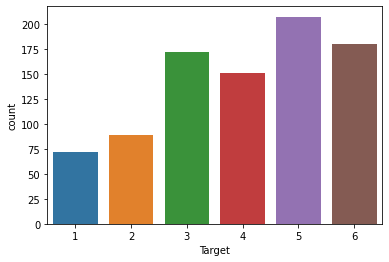

In [221]:
sn.countplot(data["Target"])

# Exploring the data:

In [222]:
data.describe()

,A,B,C,Target
count,871.000000,871.000000,871.000000,871.000000
mean,470.482204,1514.684271,2561.021814,4.001148
std,129.222242,507.581247,244.541773,1.554748
min,250.000000,700.000000,1800.000000,1.000000
25%,350.000000,1050.000000,2360.000000,3.000000
50%,450.000000,1350.000000,2600.000000,4.000000
75%,550.000000,2000.000000,2700.000000,5.000000
max,900.000000,2550.000000,3200.000000,6.000000


In [223]:
data["Target"].value_counts().sort_index()

1     72
2     89
3    172
4    151
5    207
6    180
Name: Target, dtype: int64

In [237]:
features_mean=list(data.columns[0:3])
One=data[data['Target'] ==1]
Two=data[data['Target'] ==2]
Three=data[data['Target'] ==3]
Four=data[data['Target'] ==4]
Five=data[data['Target'] ==5]
Six=data[data['Target'] ==6]

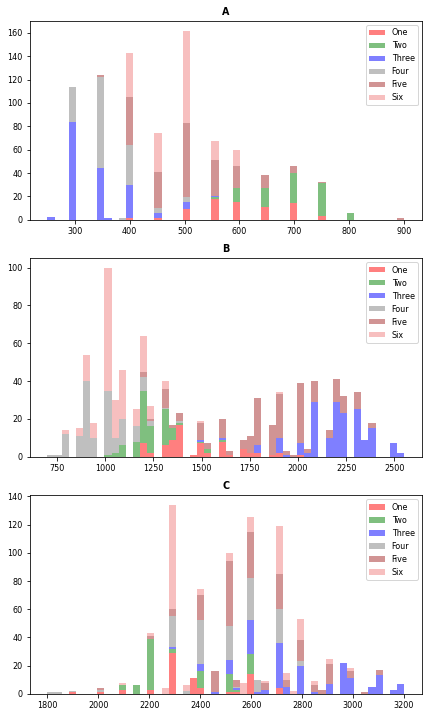

In [240]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([One[features_mean[idx]],Two[features_mean[idx]],Three[features_mean[idx]],Four[features_mean[idx]],Five[features_mean[idx]],Six[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=["One","Two","Three","Four","Five","Six"],color=['r','g',"blue","grey","brown","lightcoral"])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx],fontdict={"weight":"bold"})
plt.tight_layout()
plt.show()

# Spliting the data to Train and Test:

In [26]:
data.head()

,A,B,C,Target
0,700,1500,2600,1
1,550,1550,2400,1
2,700,1500,2600,1
3,700,1600,2700,1
4,550,1600,2600,1


In [27]:
x=data.drop(["Target"],1)
y=data["Target"]

In [113]:
x_train,x_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

As the dataset is considered as Multiclassification output so we have to categories the output variable:

In [31]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# Building the Model:

In [104]:
machine=Sequential()
machine.add(Dense(128,input_dim=3,activation="relu"))
machine.add(Dense(64,activation="relu"))
machine.add(Dense(32,activation="relu"))
machine.add(Dense(7,activation="softmax"))
machine.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
machine.fit(x_train,y_train,epochs=250,validation_data=(x_test,y_test),verbose=1,batch_size=5)


Epoch 1/250
122/122 [==============================] - 0s 3ms/step - loss: 26.3103 - accuracy: 0.3941 - val_loss: 10.3258 - val_accuracy: 0.5649
Epoch 2/250
122/122 [==============================] - 0s 2ms/step - loss: 13.6340 - accuracy: 0.5238 - val_loss: 2.5328 - val_accuracy: 0.6527
Epoch 3/250
122/122 [==============================] - 0s 2ms/step - loss: 6.4893 - accuracy: 0.6240 - val_loss: 4.5904 - val_accuracy: 0.5573
Epoch 4/250
122/122 [==============================] - 0s 2ms/step - loss: 4.8484 - accuracy: 0.6535 - val_loss: 3.9498 - val_accuracy: 0.5802
Epoch 5/250
122/122 [==============================] - 0s 2ms/step - loss: 7.1268 - accuracy: 0.6338 - val_loss: 10.8376 - val_accuracy: 0.4656
Epoch 6/250
122/122 [==============================] - 0s 2ms/step - loss: 8.4269 - accuracy: 0.6223 - val_loss: 10.8030 - val_accuracy: 0.5115
Epoch 7/250
122/122 [==============================] - 0s 2ms/step - loss: 5.4847 - accuracy: 0.6814 - val_loss: 11.2923 - val_accuracy: 

In [110]:

machine.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 128)               512       
_________________________________________________________________
dense_113 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_114 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_115 (Dense)            (None, 7)                 231       
Total params: 11,079
Trainable params: 11,079
Non-trainable params: 0
_________________________________________________________________


In [141]:
Prediction=machine.predict_classes(x_test)
Prediction

array([3, 5, 3, 5, 4, 1, 2, 1, 6, 6, 1, 5, 1, 6, 6, 3, 6, 4, 3, 3, 2, 3,
       6, 3, 6, 5, 4, 1, 5, 4, 2, 6, 5, 4, 4, 6, 2, 6, 3, 5, 6, 6, 4, 6,
       3, 6, 6, 5, 3, 5, 5, 3, 6, 2, 3, 5, 5, 4, 1, 5, 5, 5, 4, 5, 6, 5,
       5, 5, 6, 6, 4, 6, 3, 4, 3, 3, 4, 6, 3, 6, 5, 5, 5, 5, 1, 6, 4, 2,
       6, 5, 4, 2, 5, 5, 5, 2, 6, 1, 5, 5, 2, 3, 3, 6, 5, 5, 6, 5, 5, 3,
       4, 4, 5, 5, 6, 1, 5, 4, 4, 6, 5, 5, 2, 4, 6, 4, 5, 3, 2, 3, 5, 4,
       6, 2, 2, 5, 2, 5, 6, 6, 6, 1, 3, 5, 5, 6, 5, 6, 5, 4, 2, 5, 5, 5,
       6, 5, 6, 6, 6, 3, 3, 6, 5, 4, 5, 5, 3, 2, 6, 6, 4, 5, 1, 6, 5, 3,
       3, 5, 1, 3, 5, 5, 6, 4, 6, 6, 2, 3, 3, 2, 4, 2, 4, 4, 2, 6, 5, 5,
       5, 4, 4, 6, 6, 5, 3, 5, 5, 3, 6, 6, 5, 6, 3, 5, 6, 2, 4, 6, 4, 4,
       1, 4, 3, 6, 5, 5, 1, 3, 4, 4, 5, 1, 5, 6, 5, 6, 2, 6, 3, 6, 6, 5,
       5, 4, 3, 5, 5, 4, 3, 3, 4, 3, 4, 6, 6, 2, 1, 6, 2, 6, 3, 2],
      dtype=int64)

In [111]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [142]:
confusion_matrix(Y_test,Prediction)


array([[11,  5,  0,  0,  7,  0],
       [ 3, 20,  0,  0,  1,  4],
       [ 0,  0, 39,  0,  7,  0],
       [ 0,  0,  0, 37,  2,  3],
       [ 1,  0,  2,  0, 56,  4],
       [ 1,  0,  0,  3,  2, 54]], dtype=int64)

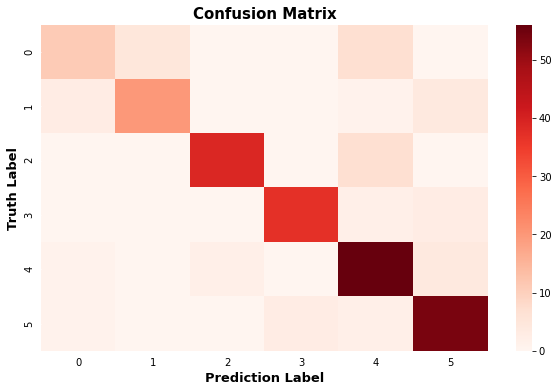

In [207]:
plt.figure(figsize=[10,6])
plt.title("Confusion Matrix",fontdict={"weight":"bold","size":15})
sn.heatmap(confusion_matrix(Y_test,Prediction,),cmap=plt.cm.Reds)
plt.ylabel("Truth Label",fontdict={"weight":"bold","size":13},color="Black")
plt.xlabel("Prediction Label",fontdict={"weight":"bold","size":13},color="Black")
plt.gcf().axes[0].tick_params(color="white")
plt.show()

In [153]:
print(classification_report(Y_test,Prediction))

              precision    recall  f1-score   support

           1       0.69      0.48      0.56        23
           2       0.80      0.71      0.75        28
           3       0.95      0.85      0.90        46
           4       0.93      0.88      0.90        42
           5       0.75      0.89      0.81        63
           6       0.83      0.90      0.86        60

    accuracy                           0.83       262
   macro avg       0.82      0.79      0.80       262
weighted avg       0.83      0.83      0.83       262



In [144]:
accuracy_score(Y_test,Prediction)*100

82.82442748091603

# Prediction with whole data:

In [208]:
Estimation=machine.predict_classes(x)

In [209]:
accuracy_score(y,Estimation)*100

85.53386911595867

In [210]:
confusion_matrix(y,Estimation)

array([[ 34,   9,   0,   0,  23,   6],
       [  4,  77,   0,   0,   2,   6],
       [  0,   0, 149,   0,  23,   0],
       [  2,   0,   0, 130,   5,  14],
       [  2,   0,   7,   0, 191,   7],
       [  2,   0,   0,   8,   6, 164]], dtype=int64)

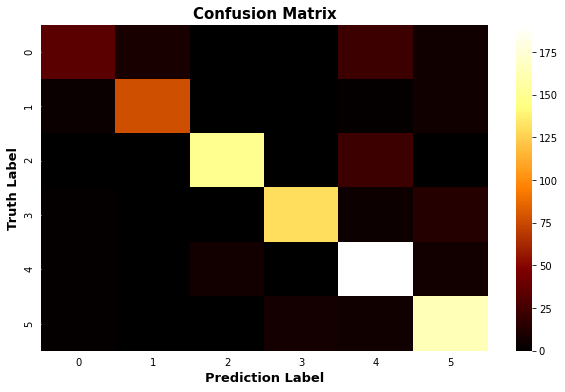

In [220]:
plt.figure(figsize=[10,6])
plt.title("Confusion Matrix",fontdict={"weight":"bold","size":15})
sn.heatmap(confusion_matrix(y,Estimation,),cmap=plt.cm.afmhot)
plt.ylabel("Truth Label",fontdict={"weight":"bold","size":13},color="Black")
plt.xlabel("Prediction Label",fontdict={"weight":"bold","size":13},color="Black")
plt.gcf().axes[0].tick_params(color="white")
plt.show()

In [211]:
print(classification_report(y,Estimation))

              precision    recall  f1-score   support

           1       0.77      0.47      0.59        72
           2       0.90      0.87      0.88        89
           3       0.96      0.87      0.91       172
           4       0.94      0.86      0.90       151
           5       0.76      0.92      0.84       207
           6       0.83      0.91      0.87       180

    accuracy                           0.86       871
   macro avg       0.86      0.82      0.83       871
weighted avg       0.86      0.86      0.85       871

